# HELP International Countries Categorization (Clustering)

#### This notebook is built for <font color = blue>HELP International </font> - an international humanitarian NGO which is committed to fight poverty and provide the people of backward countries with basic amenities and relief during the time of disasters and natural calamities.</font>

### Business Goal
Provide categorization of countries based on socio-economic and health factors to CEO of HELP International to decide which countries to be focus strategically for providing financial aid.


#### This notebook contains following steps which organizes our analysis and inferences for easy consumption driving <u>data-driven  decision making</u> for HELP International CEO.

- Section 1: Exploratory Data Analysis
- Section 2: Principle Component Analysis (PCA)
- Section 3: K-Means Clustering
- Section 4: K-Means Cluster Profiling and Analysis
- Section 5: Hierarchical Clustering
- Section 6: Hierarchical Cluster Profiling and Analysis
- Section 7: Final Analysis Summary (Final list of list of countries to be focus on)

***
>- `Created by: Chandrashekhar V Purandare`
>- `Creation Date: 21-Feb-2010`
>- `Modified by:Chandrashekhar V Purandare`
>- `Last Modified Date: 24-Feb-2020`
>- `Comments: Initial notebook creation and validation`
***

#### Pre-Req 1: Load required libraries 

In [570]:
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

# Import required libraries for data manupulation
import numpy as np
import pandas as pd

# Import required libraries for data visulization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Import required libraries for Hopkins statistic
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
from math import isnan

# Import required libraries for data scaling, ML modelling (Clustering) and model verification
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.decomposition import IncrementalPCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

#### Pre-Req 2: Set Pandas display options and format

In [571]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 200)
pd.set_option('display.max_colwidth', -1)
pd.options.display.float_format = '{:.5f}'.format

## Section 1: Exploratortory Data Analysis

### Step 1: Reading and Understanding Countries data

##### <u>Important Assumption</u>: The CSV file - "Country-data.csv", containing the Countries data is located in the same folder in which this Jupyter notebook is present.

Data Source: https://cdn.upgrad.com/UpGrad/temp/2f181ade-814a-430a-b721-769d6a9bf814/Country-data.csv

#### 1.1 Load the countries data

In [572]:
df_countries = pd.read_csv('Country-data.csv')
# Verify the data is loaded properly in dataframe
df_countries.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.20000,10.00000,7.58000,44.90000,1610,9.44000,56.20000,5.82000,553
1,Albania,16.60000,28.00000,6.55000,48.60000,9930,4.49000,76.30000,1.65000,4090
2,Algeria,27.30000,38.40000,4.17000,31.40000,12900,16.10000,76.50000,2.89000,4460
3,Angola,119.00000,62.30000,2.85000,42.90000,5900,22.40000,60.10000,6.16000,3530
4,Antigua and Barbuda,10.30000,45.50000,6.03000,58.90000,19100,1.44000,76.80000,2.13000,12200


#### 1.2 Check the strcture of the data (Normal routine checks)

In [573]:
# Check the total number of rows and columns present in data set
print("Countries data set contains {0} colmuns and {1} rows.".format(df_countries.shape[1], df_countries.shape[0]))

Countries data set contains 10 colmuns and 167 rows.


In [574]:
# Get the descriptive statistics for countries price data set
df_countries.describe().T

,count,mean,std,min,25%,50%,75%,max
child_mort,167.00000,38.27006,40.32893,2.60000,8.25000,19.30000,62.10000,208.00000
exports,167.00000,41.10898,27.41201,0.10900,23.80000,35.00000,51.35000,200.00000
health,167.00000,6.81569,2.74684,1.81000,4.92000,6.32000,8.60000,17.90000
imports,167.00000,46.89021,24.20959,0.06590,30.20000,43.30000,58.75000,174.00000
income,167.00000,17144.68862,19278.06770,609.00000,3355.00000,9960.00000,22800.00000,125000.00000
inflation,167.00000,7.78183,10.57070,-4.21000,1.81000,5.39000,10.75000,104.00000
life_expec,167.00000,70.55569,8.89317,32.10000,65.30000,73.10000,76.80000,82.80000
total_fer,167.00000,2.94796,1.51385,1.15000,1.79500,2.41000,3.88000,7.49000
gdpp,167.00000,12964.15569,18328.70481,231.00000,1330.00000,4660.00000,14050.00000,105000.00000


In [575]:
# Get the info about data set
df_countries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
country       167 non-null object
child_mort    167 non-null float64
exports       167 non-null float64
health        167 non-null float64
imports       167 non-null float64
income        167 non-null int64
inflation     167 non-null float64
life_expec    167 non-null float64
total_fer     167 non-null float64
gdpp          167 non-null int64
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


### Step 2 : Data Cleaning

#### 2.1 Missing data analysis

In [576]:
# Check for any null values
df_countries.isnull().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

#### <u>Analysis Summary</u>: It is clear from the above checks that there are <u>no missing values</u> in the data which needs to be treated. 


#### 2.2 Duplicate data analysis

In [577]:
# Verify if any duplicate rows exists for all columns
df_countries.loc[df_countries.duplicated()]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp


#### <u>Analysis Summary</u>: It can be noticed from the above output of duplicate check that there are <u>no duplicate rows</u> in the data which needs to be corrected. 

#### 2.3 Add ID column (which will be useful while performing cluster profiling)

In [578]:
# Create an ID column - which will help us to make necessary conclusions 
# and identify that which observation goes to which cluster
df_countries['ID'] = df_countries.index+100
df_countries.head()       # Check the data set after adding ID column

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,ID
0,Afghanistan,90.20000,10.00000,7.58000,44.90000,1610,9.44000,56.20000,5.82000,553,100
1,Albania,16.60000,28.00000,6.55000,48.60000,9930,4.49000,76.30000,1.65000,4090,101
2,Algeria,27.30000,38.40000,4.17000,31.40000,12900,16.10000,76.50000,2.89000,4460,102
3,Angola,119.00000,62.30000,2.85000,42.90000,5900,22.40000,60.10000,6.16000,3530,103
4,Antigua and Barbuda,10.30000,45.50000,6.03000,58.90000,19100,1.44000,76.80000,2.13000,12200,104


### Step 3: Outlier Analysis

In [579]:
df_train = df_countries
df_train.describe(percentiles=[.25,.5,.75,.90,.95,.99])

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,ID
count,167.00000,167.00000,167.00000,167.00000,167.00000,167.00000,167.00000,167.00000,167.00000,167.00000
mean,38.27006,41.10898,6.81569,46.89021,17144.68862,7.78183,70.55569,2.94796,12964.15569,183.00000
std,40.32893,27.41201,2.74684,24.20959,19278.06770,10.57070,8.89317,1.51385,18328.70481,48.35287
min,2.60000,0.10900,1.81000,0.06590,609.00000,-4.21000,32.10000,1.15000,231.00000,100.00000
25%,8.25000,23.80000,4.92000,30.20000,3355.00000,1.81000,65.30000,1.79500,1330.00000,141.50000
50%,19.30000,35.00000,6.32000,43.30000,9960.00000,5.39000,73.10000,2.41000,4660.00000,183.00000
75%,62.10000,51.35000,8.60000,58.75000,22800.00000,10.75000,76.80000,3.88000,14050.00000,224.50000
90%,100.22000,70.80000,10.94000,75.42000,41220.00000,16.64000,80.40000,5.32200,41840.00000,249.40000
95%,116.00000,80.57000,11.57000,81.14000,48290.00000,20.87000,81.40000,5.86100,48610.00000,257.70000
99%,153.40000,160.48000,13.47400,146.08000,84374.00000,41.47800,82.37000,6.56360,79088.00000,264.34000


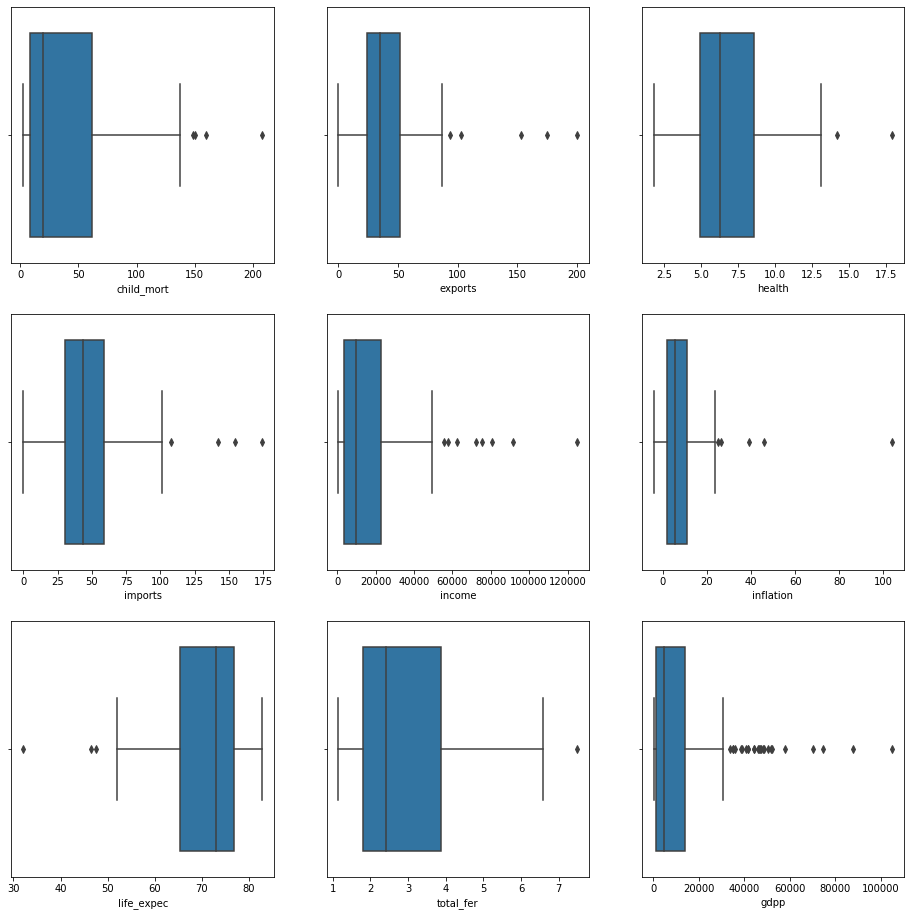

In [580]:
# Check outliers
plt.figure(figsize = (16,16))
col_list = df_train.columns[1:10]     # ignore country and ID columns
for i in enumerate(col_list):
    plt.subplot(3,3,i[0]+1)
    sns.boxplot(x = i[1], data = df_train)

#### <u>Analysis Summary</u>:
1. Large number of outliers: "exports", "health" and "imports" columns contains large number of outliers. We will not treat those as  Clustering can create separate cluster for all these outliers.
2. Less number of outliers with average data points: "gdpp" column contains overall less outlier, however, there are good number of data points than max value. We will remove these data points.
3. Less number of outliers with very few datapoints:"life_expec" and "total_fer" columns has only 3 and 1 outliers, which we will cap.
4. Though, "income" and "inflation" columns has 8 & 5 outliers respectively, we will not remove these outliers as we might miss on some important observations about social economic condtions for countires having representing these outliers.

In [581]:
# Remove the outliers for "gdpp"
q1 = df_train['gdpp'].quantile(0.01)
q4 = df_train['gdpp'].quantile(0.99)
df_train = df_train[(df_train['gdpp']>=q1) & (df_train['gdpp']<=q4)]
df_train.shape

(163, 11)

In [582]:
# Cap outliers for "life_expec" and "total_fer" columns
percentiles = df_train['life_expec'].quantile([0.01,0.99]).values
df_train['life_expec'][df_train['life_expec'] <= percentiles[0]] = percentiles[0]
df_train['life_expec'][df_train['life_expec'] >= percentiles[1]] = percentiles[1]
percentiles = df_train['total_fer'].quantile([0.01,0.99]).values
df_train['total_fer'][df_train['total_fer'] <= percentiles[0]] = percentiles[0]
df_train['total_fer'][df_train['total_fer'] >= percentiles[1]] = percentiles[1]

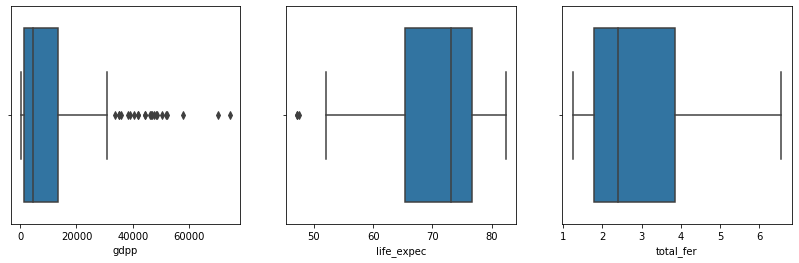

In [583]:
# Check outliers
plt.figure(figsize = (14,4))
col_list = ['gdpp','life_expec','total_fer']
for i in enumerate(col_list):
    plt.subplot(1,3,i[0]+1)
    sns.boxplot(x = i[1], data = df_train)

As you can see from above box plots, majority of the 

## Section 2: Principle Component Analysis (PCA)

### Step 1 : Data Preparation

Droping Country and ID columns to prepare dataset for performing PCA

In [584]:
# Let's first preserve the ID column, so that we can make use of it later after perfroming PCA
lst_IDs = df_train['ID']

In [585]:
df_train = df_train.drop('country', axis=1)
df_train = df_train.drop('ID', axis=1)
df_train.head() 

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,90.20000,10.00000,7.58000,44.90000,1610,9.44000,56.20000,5.82000,553
1,16.60000,28.00000,6.55000,48.60000,9930,4.49000,76.30000,1.65000,4090
2,27.30000,38.40000,4.17000,31.40000,12900,16.10000,76.50000,2.89000,4460
3,119.00000,62.30000,2.85000,42.90000,5900,22.40000,60.10000,6.16000,3530
4,10.30000,45.50000,6.03000,58.90000,19100,1.44000,76.80000,2.13000,12200


### Step 2 : Data Standardization

In [586]:
scaler = StandardScaler()
pca_train_data = scaler.fit_transform(df_train)
df_scaled = pd.DataFrame(pca_train_data)
df_scaled.columns = ['child_mort','exports','health','imports','income', \
                     'inflation','life_expec','total_fer','gdpp']
df_scaled.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.30119,-1.20535,0.31253,-0.05610,-0.82797,0.15345,-1.70877,1.96447,-0.72560
1,-0.53521,-0.49699,-0.06777,0.10528,-0.36877,-0.31115,0.66716,-0.86416,-0.50327
2,-0.26823,-0.08771,-0.94653,-0.64493,-0.20485,0.77856,0.69080,-0.02303,-0.48001
3,2.01978,0.85285,-1.43391,-0.14334,-0.59120,1.36988,-1.24777,2.19511,-0.53847
4,-0.69240,0.19170,-0.25977,0.55453,0.13734,-0.59743,0.72626,-0.53857,0.00653


In [587]:
# Check the current variance of each column in the original dataframe
100*df_train.var()/sum(df_train.var())

child_mort   0.00028 
exports      0.00011 
health       0.00000 
imports      0.00009 
income       56.46847
inflation    0.00002 
life_expec   0.00001 
total_fer    0.00000 
gdpp         43.53102
dtype: float64

### Step 3 : Applying PCA on the data

In [588]:
# Perform PCA on the data
pca = PCA(svd_solver = 'randomized', random_state = 100)
pca.fit(df_scaled)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=100,
    svd_solver='randomized', tol=0.0, whiten=False)

In [589]:
# First coponent of the first vector obtained from pca.components_
pca.components_

array([[-0.42278308,  0.25365739,  0.17439831,  0.13725079,  0.39156771,
        -0.19837782,  0.43518485, -0.41178455,  0.39500436],
       [ 0.10361325,  0.62327047, -0.24933419,  0.69195666, -0.04348284,
        -0.059969  , -0.16326841,  0.07522542, -0.14840547],
       [ 0.01214364,  0.19844138, -0.56545902, -0.25996639,  0.36658833,
         0.63308294,  0.07862407,  0.06830217,  0.16467901],
       [ 0.41242335,  0.0959013 ,  0.4499709 ,  0.04494619,  0.37134626,
         0.02368635, -0.2479885 ,  0.40363014,  0.50333018],
       [-0.14080198,  0.05322305,  0.54689967,  0.22471374, -0.22440766,
         0.73314226,  0.09021799, -0.11661112, -0.13473228],
       [ 0.23696121, -0.06197776,  0.00701166, -0.01743504,  0.19383215,
         0.05827201, -0.57724981, -0.75184206, -0.0143053 ],
       [-0.10002977,  0.68298404,  0.24157871, -0.61157636, -0.10916197,
        -0.11261707, -0.15174922,  0.01220788, -0.20824295],
       [ 0.72024083,  0.14441573, -0.01510948, -0.08361895, -0

In [590]:
# How much variance explained by the first principal component
pca.explained_variance_ratio_

array([0.45881081, 0.17653977, 0.12981385, 0.10562395, 0.07454655,
       0.02225356, 0.01361851, 0.01177285, 0.00702015])

#### Screeplot

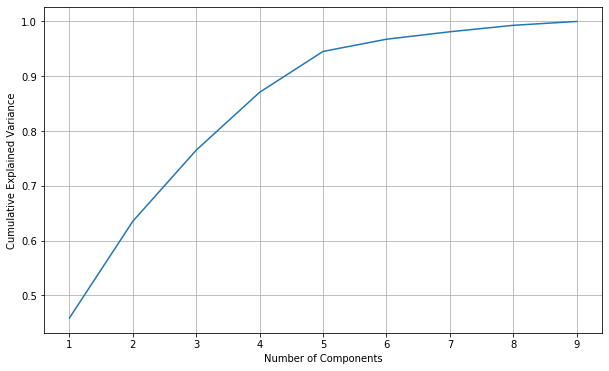

In [591]:
# Plotting the cumulative variance against the number of components
fig = plt.figure(figsize = (10,6))
plt.plot([1,2,3,4,5,6,7,8,9], np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid()

#### <u>Analysis Summary</u>:
Basedon the analysis of the above Screeplot, going with <u>PC as 4</u> as almost <b>94%</b> variance is explained by first 4 components

#### Final PCA with 4 components

In [592]:
#Using Incremental PCA for efficiency
pca_final = IncrementalPCA(n_components=4)

In [593]:
pca_train_data = pca_final.fit_transform(df_scaled)
df_pca_final = pd.DataFrame(pca_train_data)
df_pca_final.columns = ['PC1', 'PC2','PC3','PC4']
df_pca_final.head()

,PC1,PC2,PC3,PC4
0,-3.00288,-0.17952,0.71149,1.10333
1,0.46676,-0.34321,0.51074,-1.21129
2,-0.27520,-0.36290,-1.07801,-1.04903
3,-3.06943,1.39960,-1.65189,1.01809
4,1.08295,0.35441,0.25354,-0.71040


#### Coorrelation Matrix
Verify the correlation between the PCs

In [594]:
corrmat = np.corrcoef(df_pca_final.transpose())
corrmat.shape

(4, 4)

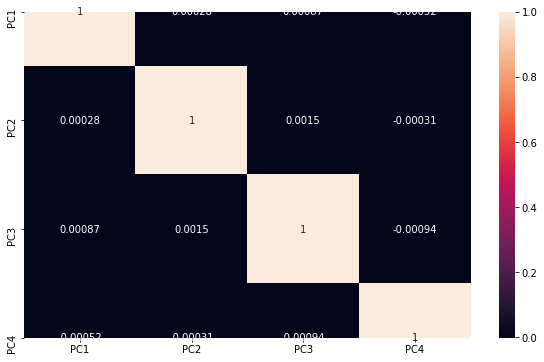

In [595]:
plt.figure(figsize=[10,6])
sns.heatmap(df_pca_final.corr(), annot=True)

#### <u>Analysis Summary</u>:
As seen in above Heatmap, there is zero (0) corelation between all the 4 components.

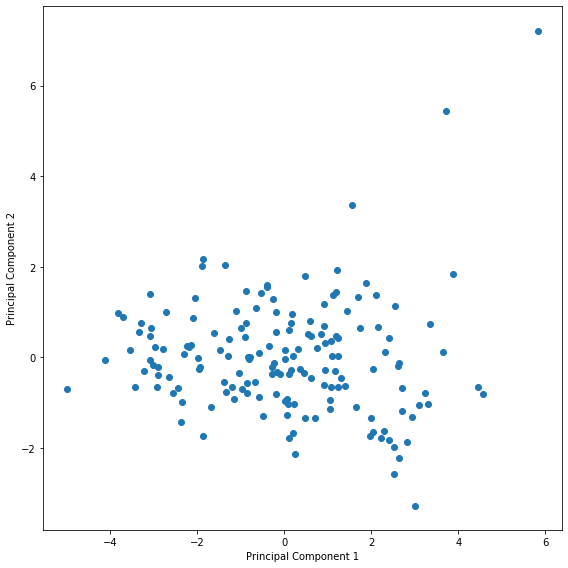

In [596]:
fig = plt.figure(figsize = (8,8))
plt.scatter(df_pca_final.PC1, df_pca_final.PC2)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.tight_layout()

## Section 3: K-Means Clustering

### Step 1 : Hopkins Statistics

The Hopkins statistics is used to assess the clustering tendency of a dataset by measuring the probability that a given data set is generated by a uniform data distribution.  Hopkins Statistics help to decide whether clusters can be formed for the given dataset. If the values are:
- Hopkins Statistics value between 0.01 - 0.3 indicates low chances of clustering.
- If Hopkins Statistics value is around 0.5 we consider datapoint are Random in the dataset.
- When Hopkins Statistics value is between 0.7 - 0.99 there is high chance of clustering.

In [597]:
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [598]:
print("Hopkins Statistics value : {}".format(round(hopkins(df_pca_final),2))) 

Hopkins Statistics value : 0.84


#### <u>Analysis Summary</u>:
Since the Hopkins Statistics value is between 0.7 - 0.99, there is a high chance of clustering to be formed for our data set.

### Step 2 : Execute K- Means Clustering Iterations to find optimal number of clusters (best k)

Let run first iteration of K-Means clustering with K = 3

In [599]:
# K-Means with K=3
kmeans_model_cl3 = KMeans(n_clusters = 3, max_iter=50, random_state = 100)
kmeans_model_cl3.fit(df_pca_final)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=50,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=100, tol=0.0001, verbose=0)

#### 2.1 Silhouette Analysis

* The value of the silhouette score range lies between -1 to 1. 

* A score closer to 1 indicates that the data point is very similar to other data points in the cluster, 

* A score closer to -1 indicates that the data point is not similar to the data points in its cluster.

In [600]:
range_n_clusters = range(2,15)
sse_ = []
for num_clusters in range_n_clusters:
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(df_pca_final)
    
    cluster_labels = kmeans.labels_
    sse_.append([num_clusters, silhouette_score(df_pca_final, kmeans.labels_)])
    # silhouette score
    silhouette_avg = silhouette_score(df_pca_final, cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))

For n_clusters=2, the silhouette score is 0.3226359952657854
For n_clusters=3, the silhouette score is 0.3399784482307202
For n_clusters=4, the silhouette score is 0.3574453912220109
For n_clusters=5, the silhouette score is 0.28471733833242174
For n_clusters=6, the silhouette score is 0.30059197524463593
For n_clusters=7, the silhouette score is 0.28081196432274447
For n_clusters=8, the silhouette score is 0.27806296211534953
For n_clusters=9, the silhouette score is 0.2723357607018617
For n_clusters=10, the silhouette score is 0.2716737004676685
For n_clusters=11, the silhouette score is 0.27752277987327617
For n_clusters=12, the silhouette score is 0.25351602152398284
For n_clusters=13, the silhouette score is 0.28576286138842344
For n_clusters=14, the silhouette score is 0.2896489861694691


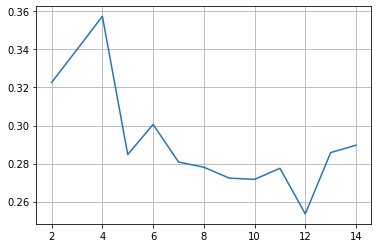

In [601]:
plt.plot(pd.DataFrame(sse_)[0], pd.DataFrame(sse_)[1])
plt.grid()

#### <u>Analysis Summary</u>:
Based on the analysis of the silhouette scores for clusters and silhouette scores plot we can conclude that the score is dropping after 5th cluster. However, there is not much of the difference for silhouette score for cluster 4 and 5 and hence we can go with 4 clusters.

Let's confirm our understanding using another method to choose optimal number of clusters (k), which is elbow-curve/SSD.

#### 2.2 Elbow-curve / SSD

In [602]:
ssd = []
for num_clusters in list(range(1,21)):
    model_clus = KMeans(n_clusters = num_clusters, max_iter=50)
    model_clus.fit(df_pca_final)
    ssd.append(model_clus.inertia_)

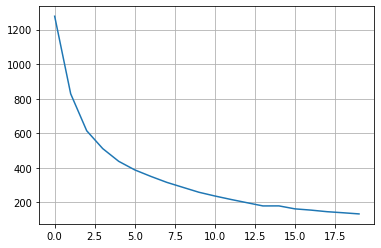

In [603]:
plt.plot(ssd)
plt.grid()

#### <u>Analysis Summary</u>:
Based on the analysis of above silhouette score plot, we can conclude that highest peak is at k=4 and in sum of squared distances graph. We see that the elbow is in the range of 3 to 5 , so we will consider k as 4 for our final clustering model.

### Step 3 : Perform final clustering with k=4

In [604]:
# K-Means with K=4
kmeans_model_final = KMeans(n_clusters = 4, max_iter=50, random_state = 100)
kmeans_model_final.fit(df_pca_final)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=50,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=100, tol=0.0001, verbose=0)

## Section 4: K-Means Cluster Profiling and Analysis

In [605]:
df_km_final = df_pca_final
df_km_final.index = pd.RangeIndex(len(df_km_final.index))
df_countries_cluster = pd.concat([df_km_final, pd.Series(kmeans_model_final.labels_)], axis=1)
df_countries_cluster.columns = ['PC1', 'PC2','PC3','PC4','ClusterID']
df_countries_cluster.head()

,PC1,PC2,PC3,PC4,ClusterID
0,-3.00288,-0.17952,0.71149,1.10333,0
1,0.46676,-0.34321,0.51074,-1.21129,2
2,-0.27520,-0.36290,-1.07801,-1.04903,2
3,-3.06943,1.39960,-1.65189,1.01809,0
4,1.08295,0.35441,0.25354,-0.71040,2


In [606]:
df_countries_cluster.shape

(163, 5)

In [607]:
df_countries_cluster['ClusterID'].value_counts()

2    85
0    45
1    31
3    2 
Name: ClusterID, dtype: int64

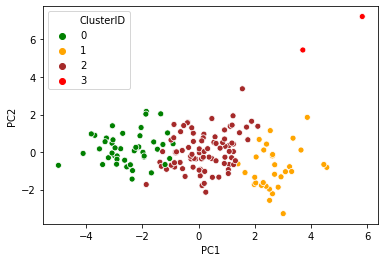

In [608]:
# scatter plot for PC1, PC2 and clusterId
sns.scatterplot(x='PC1',y='PC2',hue='ClusterID',legend='full', \
                data=df_countries_cluster, palette=['green','orange','brown','red'])

#### <u>Analysis Summary</u>:
The above scatter plot for PC1, PC2 and clusterId shows clearly that K-Means has clearly able to create the 4 clusters on our PCA applied dataset. Clustering algorithm is also able to treat the outliers and created a separate cluster for those outliers.

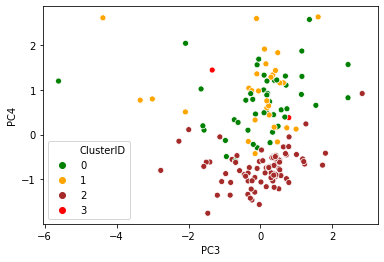

In [609]:
# scatter plot for PC3, PC4 and clusterId
sns.scatterplot(x='PC3',y='PC4',hue='ClusterID',legend='full', \
                data=df_countries_cluster,palette=['green','orange','brown','red'])

#### <u>Analysis Summary</u>:
The above scatter plot for PC3, PC4 and clusterId shows clearly that clusters formed by K-Means are not as clean as for PC1 and PC2 which has highest variance.

#### Merge cluster dataset with the original countries dataset

In [610]:
# Merge df_countries_cluster dataset with original df_countries dataset
df_merged_km = pd.merge(df_countries.reset_index().drop('index', axis = 1),df_countries_cluster,left_index=True,right_index=True )
df_merged_km.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,ID,PC1,PC2,PC3,PC4,ClusterID
0,Afghanistan,90.20000,10.00000,7.58000,44.90000,1610,9.44000,56.20000,5.82000,553,100,-3.00288,-0.17952,0.71149,1.10333,0
1,Albania,16.60000,28.00000,6.55000,48.60000,9930,4.49000,76.30000,1.65000,4090,101,0.46676,-0.34321,0.51074,-1.21129,2
2,Algeria,27.30000,38.40000,4.17000,31.40000,12900,16.10000,76.50000,2.89000,4460,102,-0.27520,-0.36290,-1.07801,-1.04903,2
3,Angola,119.00000,62.30000,2.85000,42.90000,5900,22.40000,60.10000,6.16000,3530,103,-3.06943,1.39960,-1.65189,1.01809,0
4,Antigua and Barbuda,10.30000,45.50000,6.03000,58.90000,19100,1.44000,76.80000,2.13000,12200,104,1.08295,0.35441,0.25354,-0.71040,2


Drop PCA columns which are not required fro further cluster analysis.

In [611]:
df_merged_km.drop(['PC1','PC2','PC3','PC4'], axis=1, inplace=True)
df_merged_km.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,ID,ClusterID
0,Afghanistan,90.20000,10.00000,7.58000,44.90000,1610,9.44000,56.20000,5.82000,553,100,0
1,Albania,16.60000,28.00000,6.55000,48.60000,9930,4.49000,76.30000,1.65000,4090,101,2
2,Algeria,27.30000,38.40000,4.17000,31.40000,12900,16.10000,76.50000,2.89000,4460,102,2
3,Angola,119.00000,62.30000,2.85000,42.90000,5900,22.40000,60.10000,6.16000,3530,103,0
4,Antigua and Barbuda,10.30000,45.50000,6.03000,58.90000,19100,1.44000,76.80000,2.13000,12200,104,2


Create dataframes by calculating Means for columns to compare with cluster formed

In [613]:
df_child_mort_mean = pd.DataFrame(df_merged_km.groupby(["ClusterID"]).child_mort.mean())
df_exports_mean= pd.DataFrame(df_merged_km.groupby(["ClusterID"]).exports.mean())
df_health_mean = pd.DataFrame(df_merged_km.groupby(["ClusterID"]).health.mean())
df_imports_mean = pd.DataFrame(df_merged_km.groupby(["ClusterID"]).imports.mean())
df_income_mean = pd.DataFrame(df_merged_km.groupby(["ClusterID"]).income.mean())
df_inflat_mean = pd.DataFrame(df_merged_km.groupby(["ClusterID"]).inflation.mean())
df_life_expec_mean = pd.DataFrame(df_merged_km.groupby(["ClusterID"]).life_expec.mean())
df_total_fer_mean = pd.DataFrame(df_merged_km.groupby(["ClusterID"]).total_fer.mean())
df_gdpp_mean = pd.DataFrame(df_merged_km.groupby(["ClusterID"]).gdpp.mean())

Merge dataframes with mean values for analysis

In [614]:
df_cluster_analysis = pd.concat([pd.Series([0,1,2,3]),df_child_mort_mean,df_exports_mean, \
                                 df_health_mean,df_imports_mean,df_income_mean,df_inflat_mean, \
                                 df_life_expec_mean,df_total_fer_mean,df_gdpp_mean], axis=1)

Reorder the columns for cluster analysis dataframe

In [615]:
df_cluster_analysis.columns = ["ClusterID","child_mort_mean","exports_mean","health_mean","imports_mean","income_mean","inflation_mean","life_expec_mean","total_fer_mean","gdpp_mean"]
df_cluster_analysis

,ClusterID,child_mort_mean,exports_mean,health_mean,imports_mean,income_mean,inflation_mean,life_expec_mean,total_fer_mean,gdpp_mean
0,0,44.79778,44.25511,6.44867,49.83556,16326.46667,8.16609,69.14000,3.22756,12665.40000
1,1,25.56774,45.68416,6.86000,49.26987,20736.12903,4.73968,72.84839,2.51613,16745.25806
2,2,39.15412,37.39071,7.08824,44.54471,16866.14118,8.00520,70.66706,2.91024,12333.15294
3,3,37.35000,55.90000,5.02500,55.65000,11640.00000,4.56000,69.25000,3.60500,5035.00000


#### Cluster analysis for Net income per person, Inflation rate and Gdpp

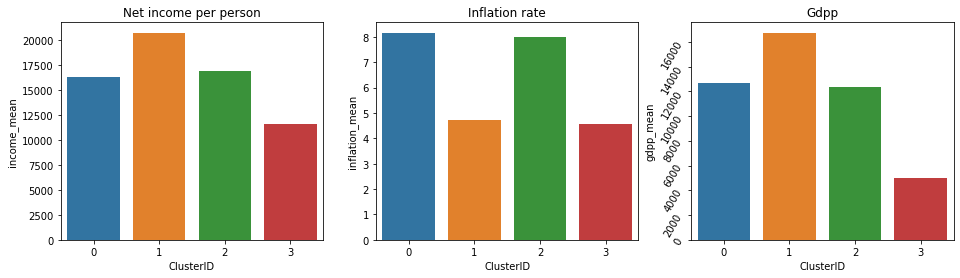

In [616]:
plt.figure(figsize = (16,4))
plt.figure(1)

# subplot 1
plt.subplot(1, 3, 1)
plt.title("Net income per person")
sns.barplot(df_cluster_analysis.ClusterID, df_cluster_analysis.income_mean)

# subplot 2 
plt.subplot(1, 3, 2)
plt.title("Inflation rate")
sns.barplot(df_cluster_analysis.ClusterID, df_cluster_analysis.inflation_mean)

# subplot 3
plt.subplot(1, 3, 3)
plt.title("Gdpp")
sns.barplot(df_cluster_analysis.ClusterID, df_cluster_analysis.gdpp_mean)
plt.tick_params(axis ='y', rotation = 60)

#### <u>Analysis Summary</u>:
Countries in Cluster 1 is having highest net income per person and Gdpp, whereas countries in Cluster 0 & 2 has lower net income per person and Gdpp. Countries in cluster 3 has lowest net income per person and Gdpp, though, this cluster has only two countries. This indicates Cluster 1 contains developed countries and Cluster 0 contains under developed countries.

#### Cluster analysis for child mortality, life expectancy and total fertility

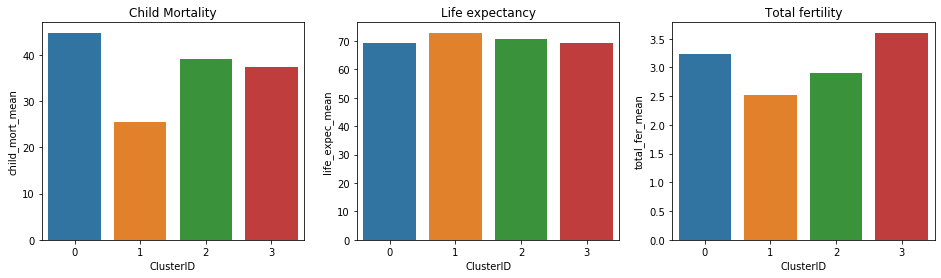

In [617]:
plt.figure(figsize = (16,4))
plt.figure(1)

# subplot 1
plt.subplot(1, 3, 1)
plt.title("Child Mortality")
sns.barplot(df_cluster_analysis.ClusterID, df_cluster_analysis.child_mort_mean)

# subplot 2 
plt.subplot(1, 3, 2)
plt.title("Life expectancy")
sns.barplot(df_cluster_analysis.ClusterID, df_cluster_analysis.life_expec_mean)

# subplot 3
plt.subplot(1, 3, 3)
plt.title("Total fertility")
sns.barplot(df_cluster_analysis.ClusterID, df_cluster_analysis.total_fer_mean)

#### <u>Analysis Summary</u>:
Countries in Cluster 1 is having highest life expectancy and lowest child mortality. The total fertility rate is lowest for cluster 1 countries. 

On the contrary, countries in Cluster 0 has highest child mortality and comparatively lower life expectancy.

#### Cluster analysis for exports, imports and total health spendings

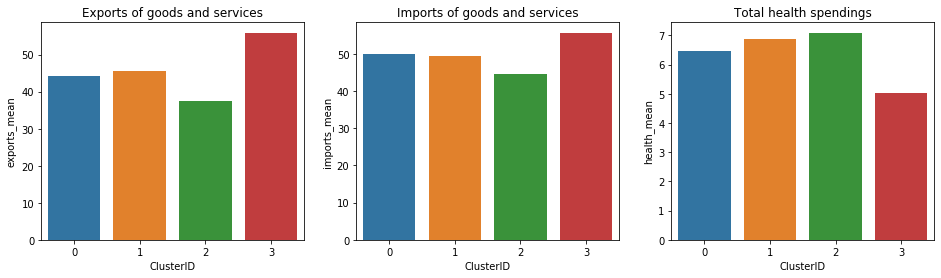

In [618]:
plt.figure(figsize = (16,4))
plt.figure(1)

# subplot 1
plt.subplot(1, 3, 1)
plt.title("Exports of goods and services")
sns.barplot(df_cluster_analysis.ClusterID, df_cluster_analysis.exports_mean)

# subplot 2 
plt.subplot(1, 3, 2)
plt.title("Imports of goods and services")
sns.barplot(df_cluster_analysis.ClusterID, df_cluster_analysis.imports_mean)

# subplot 3
plt.subplot(1, 3, 3)
plt.title("Total health spendings")
sns.barplot(df_cluster_analysis.ClusterID, df_cluster_analysis.health_mean)

#### <u>Analysis Summary</u>:
Countries in Cluster 0 is having lower total health spendings compared to countries in Cluster 1 & 2. Countries in Cluster 3 is having lowest total health spendings.

Countries in Cluster 1 has comparatively higher rate of exports and imports compared to cluster 0 & 2. 

#### Overall cluster analysis based on 4 principal components

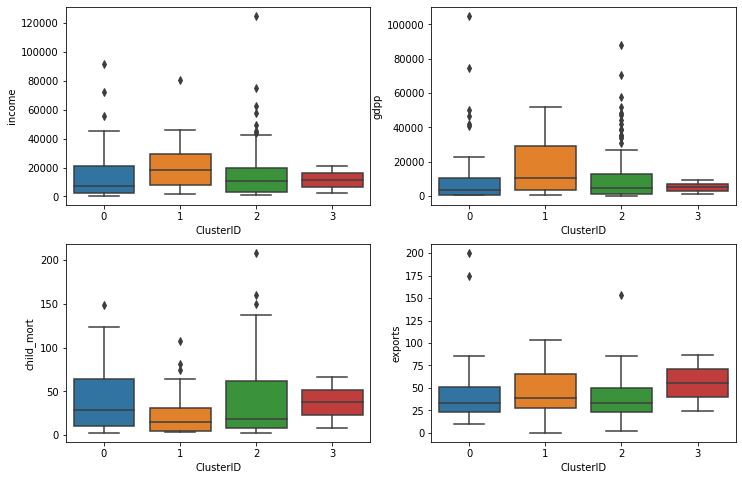

In [619]:
plt.figure(figsize = (12,8))
var = ['income', 'gdpp', 'child_mort', 'exports']
for i in enumerate(var):
    plt.subplot(2,2,i[0]+1)
    sns.boxplot(x= 'ClusterID', y = i[1], data = df_merged_km)

#### <u>Analysis Summary</u>:
<u>Note:</u> Since, Cluster 3 contains only 2 countries, for overall comparison below, we have focused in Cluster 0,1 & 2.
- Income and Gdpp is highest for countries in cluster 1 and lowest for countries in  cluster 0.
- Child mortality is higher in cluster 0 counties and comparatively lower in Cluster 1 and 2.
- Exports rate is higher for countires in Cluster 1 as compare to countries in Cluster 0 & 2.

#### As per above analysis summary, we will focus on countries in Cluster 0 and 2 to find out top 10 countries which are in direst need of aid.
We will consider the top 10 countries with the below considerations.
1. Child mortality rate is high.
2. Life expectancy is low
3. Countries with lowest net income per person and Gdpp rate.

In [655]:
# Filter the dataframe to get the countries part of Cluster 0
df_focus_cluster = df_merged_km[(df_merged_km['ClusterID']==0) | (df_merged_km['ClusterID']==2)]
# Sort DF to get top 10 countries as per the above mentioned criteria for direst need of aid.
df_focus_cluster.sort_values(['gdpp','income','child_mort','health','inflation','life_expec','total_fer','imports','exports'], 
                      ascending=[True,True,False,True,False,True,False,False,True]).head(10)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,ID,ClusterID
26,Burundi,93.60000,8.92000,11.60000,39.20000,764,12.30000,57.70000,6.26000,231,126,2
88,Liberia,89.30000,19.10000,11.80000,92.60000,700,5.47000,60.80000,5.02000,327,188,2
37,"Congo, Dem. Rep.",116.00000,41.10000,7.91000,49.60000,609,20.80000,57.50000,6.54000,334,137,0
112,Niger,123.00000,22.20000,5.16000,49.10000,814,2.55000,58.80000,7.49000,348,212,0
132,Sierra Leone,160.00000,16.80000,13.10000,34.50000,1220,17.20000,55.00000,5.20000,399,232,2
93,Madagascar,62.20000,25.00000,3.77000,43.00000,1390,8.79000,60.80000,4.60000,413,193,2
106,Mozambique,101.00000,31.50000,5.21000,46.20000,918,7.64000,54.50000,5.56000,419,206,2
31,Central African Republic,149.00000,11.80000,3.98000,26.50000,888,2.01000,47.50000,5.21000,446,131,0
94,Malawi,90.50000,22.80000,6.59000,34.90000,1030,12.10000,53.10000,5.31000,459,194,0
50,Eritrea,55.20000,4.79000,2.66000,23.30000,1420,11.60000,61.70000,4.61000,482,150,2


As per K- means clustering, the country which are direst need of aid after applying above mention criteria are:
1. Burundi
2. Liberia
3. Congo, Dem. Rep
4. Niger
5. Sierra Leone
6. Madagascar
7. Mozambique
8. Central African Republic
9. Malawi
10. Eritrea

## Section 5: Hierarchical Clustering

### Step 1 : Creating the dendrogram using Single linkage method

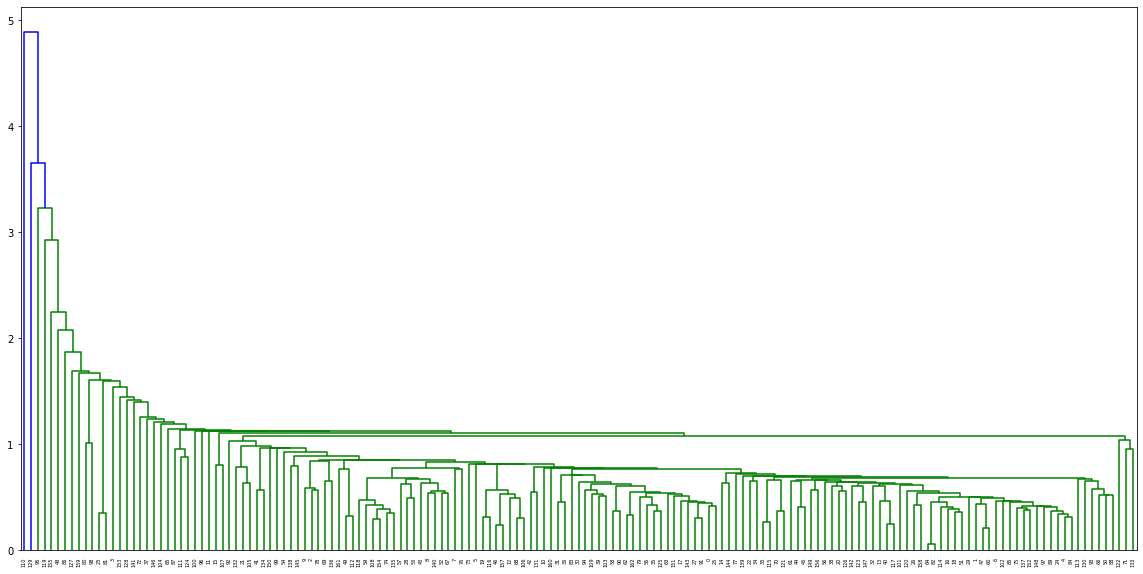

In [620]:
plt.figure(figsize = (20,10))
mergings = linkage(df_pca_final, method = "single", metric='euclidean')
dendrogram(mergings)
plt.show()

#### <u>Analysis Summary</u>:
As we can clearly see from above dendrogram, single linkage doesn't produce a good enough result for us to analyze the clusters. Hence, we need to go ahead and utilize the complete linkage method and then analyze the clusters once again.

### Step 2 : Creating the dendrogram using Complete linkage method

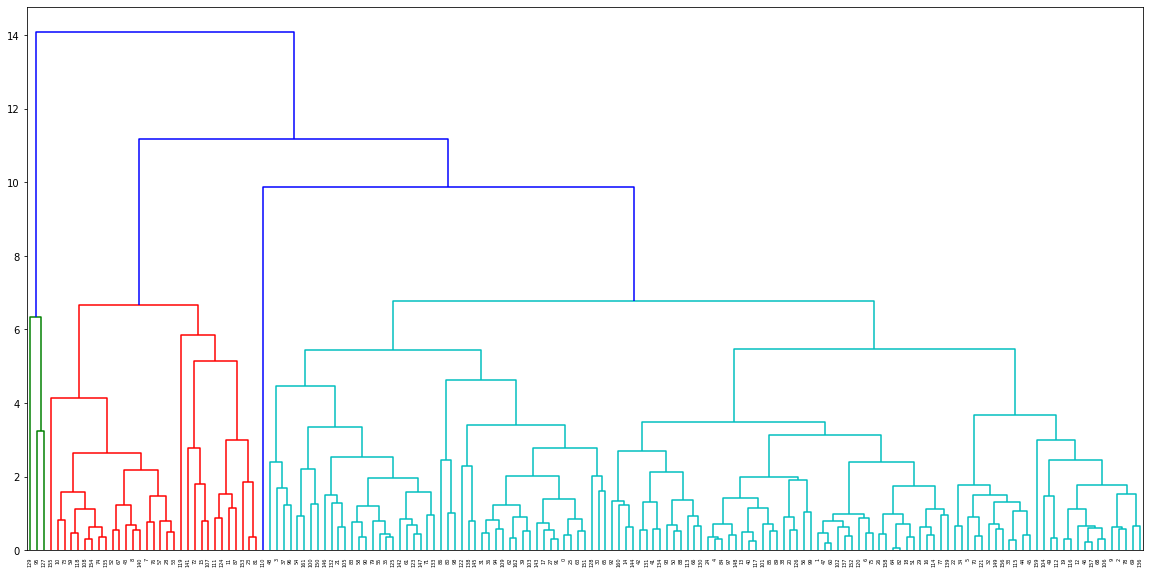

In [621]:
plt.figure(figsize = (20,10))
mergings = linkage(df_pca_final, method = "complete", metric='euclidean')
dendrogram(mergings)
plt.show()

### Step 3 : Cutting the dendrogram at an appropriate level

Lets cut the dendrogram vertically such that n_clusters = 4

In [622]:
cluster_labels = pd.Series(cut_tree(mergings, n_clusters = 4).reshape(-1,))

In [624]:
cluster_labels.shape

(163,)

## Section 6: Hirerchical Cluster Profiling and Analysis

In [625]:
df_countries_cluster_hch = pd.concat([df_pca_final.reset_index().drop('index', axis = 1), cluster_labels], axis=1)
df_countries_cluster_hch.columns = ['PC1', 'PC2','PC3','PC4','ClusterID']
df_countries_cluster_hch.head()

,PC1,PC2,PC3,PC4,ClusterID
0,-3.00288,-0.17952,0.71149,1.10333,0
1,0.46676,-0.34321,0.51074,-1.21129,0
2,-0.27520,-0.36290,-1.07801,-1.04903,0
3,-3.06943,1.39960,-1.65189,1.01809,0
4,1.08295,0.35441,0.25354,-0.71040,0


In [626]:
df_countries_cluster_hch['ClusterID'].value_counts()

0    128
1    31 
2    3  
3    1  
Name: ClusterID, dtype: int64

#### Merge cluster dataset with the original countries dataset

In [627]:
# Merge df_countries_cluster dataset with original df_countries dataset
df_merged_hch = pd.merge(df_countries.reset_index().drop('index', axis = 1),df_countries_cluster_hch,left_index=True,right_index=True )
df_merged_hch.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,ID,PC1,PC2,PC3,PC4,ClusterID
0,Afghanistan,90.20000,10.00000,7.58000,44.90000,1610,9.44000,56.20000,5.82000,553,100,-3.00288,-0.17952,0.71149,1.10333,0
1,Albania,16.60000,28.00000,6.55000,48.60000,9930,4.49000,76.30000,1.65000,4090,101,0.46676,-0.34321,0.51074,-1.21129,0
2,Algeria,27.30000,38.40000,4.17000,31.40000,12900,16.10000,76.50000,2.89000,4460,102,-0.27520,-0.36290,-1.07801,-1.04903,0
3,Angola,119.00000,62.30000,2.85000,42.90000,5900,22.40000,60.10000,6.16000,3530,103,-3.06943,1.39960,-1.65189,1.01809,0
4,Antigua and Barbuda,10.30000,45.50000,6.03000,58.90000,19100,1.44000,76.80000,2.13000,12200,104,1.08295,0.35441,0.25354,-0.71040,0


Drop PCA columns which are not required fro further cluster analysis.

In [628]:
df_merged_hch.drop(['PC1','PC2','PC3','PC4'], axis=1, inplace=True)
df_merged_hch.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,ID,ClusterID
0,Afghanistan,90.20000,10.00000,7.58000,44.90000,1610,9.44000,56.20000,5.82000,553,100,0
1,Albania,16.60000,28.00000,6.55000,48.60000,9930,4.49000,76.30000,1.65000,4090,101,0
2,Algeria,27.30000,38.40000,4.17000,31.40000,12900,16.10000,76.50000,2.89000,4460,102,0
3,Angola,119.00000,62.30000,2.85000,42.90000,5900,22.40000,60.10000,6.16000,3530,103,0
4,Antigua and Barbuda,10.30000,45.50000,6.03000,58.90000,19100,1.44000,76.80000,2.13000,12200,104,0


Create dataframes by calculating Means for columns to compare with cluster formed

In [631]:
df_child_mort_mean = pd.DataFrame(df_merged_hch.groupby(["ClusterID"]).child_mort.mean())
df_exports_mean= pd.DataFrame(df_merged_hch.groupby(["ClusterID"]).exports.mean())
df_health_mean = pd.DataFrame(df_merged_hch.groupby(["ClusterID"]).health.mean())
df_imports_mean = pd.DataFrame(df_merged_hch.groupby(["ClusterID"]).imports.mean())
df_income_mean = pd.DataFrame(df_merged_hch.groupby(["ClusterID"]).income.mean())
df_inflat_mean = pd.DataFrame(df_merged_hch.groupby(["ClusterID"]).inflation.mean())
df_life_expec_mean = pd.DataFrame(df_merged_hch.groupby(["ClusterID"]).life_expec.mean())
df_total_fer_mean = pd.DataFrame(df_merged_hch.groupby(["ClusterID"]).total_fer.mean())
df_gdpp_mean = pd.DataFrame(df_merged_hch.groupby(["ClusterID"]).gdpp.mean())

Merge dataframes with mean values for analysis

In [632]:
df_cluster_analysis = pd.concat([pd.Series([0,1,2,3]),df_child_mort_mean,df_exports_mean, \
                                 df_health_mean,df_imports_mean,df_income_mean,df_inflat_mean, \
                                 df_life_expec_mean,df_total_fer_mean,df_gdpp_mean], axis=1)

Reorder the columns for cluster analysis dataframe

In [633]:
df_cluster_analysis.columns = ["ClusterID","child_mort_mean","exports_mean","health_mean","imports_mean","income_mean","inflation_mean","life_expec_mean","total_fer_mean","gdpp_mean"]
df_cluster_analysis

,ClusterID,child_mort_mean,exports_mean,health_mean,imports_mean,income_mean,inflation_mean,life_expec_mean,total_fer_mean,gdpp_mean
0,0,40.82109,40.27023,6.78508,46.67891,16589.32031,8.01253,70.26406,2.99867,12284.46094
1,1,28.64839,42.90674,7.04806,47.24729,20541.93548,5.37658,71.94516,2.60161,16490.41935
2,2,31.20000,47.00000,5.50667,54.80000,9560.00000,3.61333,70.00000,3.85000,4506.66667
3,3,4.50000,72.00000,11.90000,63.60000,45500.00000,0.84800,80.70000,1.79000,50300.00000


#### Cluster analysis for Net income per person, Inflation rate and Gdpp

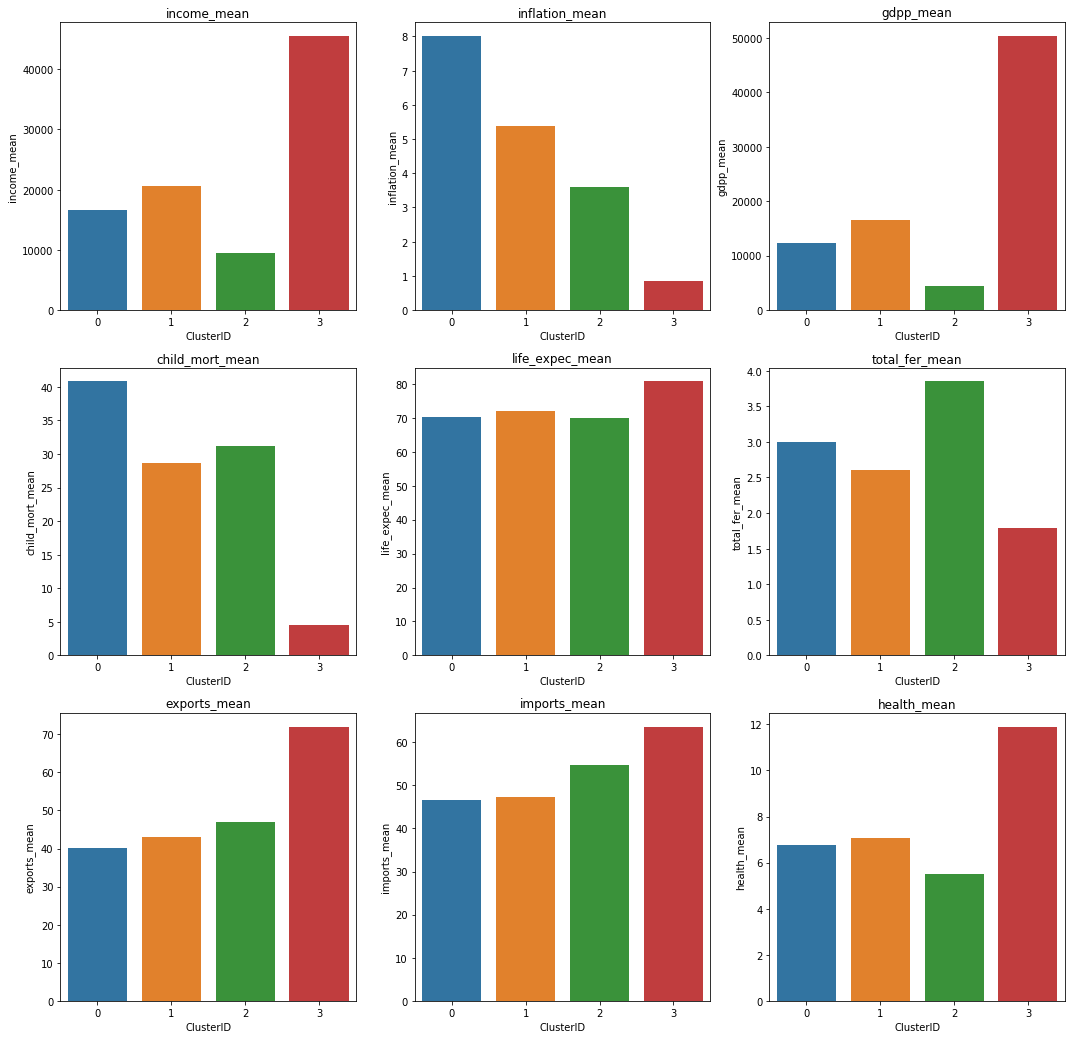

In [657]:
plt.figure(figsize = (18,18))
plt.figure(1)

def plot_bar_chart(chartindex,field):
    plt.subplot(3, 3, chartindex)
    plt.title(field)
    sns.barplot(df_cluster_analysis.ClusterID, df_cluster_analysis[field])

plot_bar_chart(1,'income_mean')
plot_bar_chart(2,'inflation_mean')
plot_bar_chart(3,'gdpp_mean')
plot_bar_chart(4,'child_mort_mean')
plot_bar_chart(5,'life_expec_mean')
plot_bar_chart(6,'total_fer_mean')
plot_bar_chart(7,'exports_mean')
plot_bar_chart(8,'imports_mean')
plot_bar_chart(9,'health_mean')

#### <u>Analysis Summary</u>:
<u>Note:</u> Since, Cluster 2 contains only 3 countries and Cluster 3 contains single country, for overall comparison below, we have focused in Cluster 0 and 1.
Based on the analysis of bar plots above for various features, cluster 0 contains the countries which needs to be focus for deriving the countries which are in direst need of aid due to below considerations.
- Higher child mortality
- Lower net income per person and Gdpp (when compare with Cluster 1)
- Highest Inflation
- Comparatively low life expectancy 
- Higher total fertility (when compare with Cluster 1)

In [658]:
# Filter the dataframe to get the countries part of Cluster 0
df_focus_cluster = df_merged_hch[df_merged_hch['ClusterID']==0]
# Sort DF to get top 10 countries as per the above mentioned criteria for direst need of aid.
df_focus_cluster.sort_values(['gdpp','income','child_mort','health','inflation','life_expec','total_fer','imports','exports'], 
                      ascending=[True,True,False,True,False,True,False,False,True]).head(10)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,ID,ClusterID
26,Burundi,93.60000,8.92000,11.60000,39.20000,764,12.30000,57.70000,6.26000,231,126,0
88,Liberia,89.30000,19.10000,11.80000,92.60000,700,5.47000,60.80000,5.02000,327,188,0
37,"Congo, Dem. Rep.",116.00000,41.10000,7.91000,49.60000,609,20.80000,57.50000,6.54000,334,137,0
112,Niger,123.00000,22.20000,5.16000,49.10000,814,2.55000,58.80000,7.49000,348,212,0
132,Sierra Leone,160.00000,16.80000,13.10000,34.50000,1220,17.20000,55.00000,5.20000,399,232,0
93,Madagascar,62.20000,25.00000,3.77000,43.00000,1390,8.79000,60.80000,4.60000,413,193,0
106,Mozambique,101.00000,31.50000,5.21000,46.20000,918,7.64000,54.50000,5.56000,419,206,0
31,Central African Republic,149.00000,11.80000,3.98000,26.50000,888,2.01000,47.50000,5.21000,446,131,0
94,Malawi,90.50000,22.80000,6.59000,34.90000,1030,12.10000,53.10000,5.31000,459,194,0
50,Eritrea,55.20000,4.79000,2.66000,23.30000,1420,11.60000,61.70000,4.61000,482,150,0



## <font color=blue> Section 7: Final Analysis Summary </font>

<font color=blue>
We used two types of clustering models - K-means and Hierarchical Clustering to first identify the cluster which can segregate  the countries  based on socio-economic and health factors.

We have then considered the top 10 countries which are in direst need of aid based on the socio-economic and health factors that determine the overall development of the country. Following factors taken into considerations to decide the top 10 countries which require aid on priority bais.

- Child mortality rate is high.
- Life expectancy is low
- Countries with lower net income per person 
- Countries with lower Gdpp rate.

As per Hierarchical Clustering, the countries which require aid are:
1. Burundi
2. Liberia
3. Congo, Dem. Rep
4. Niger
5. Sierra Leone
6. Madagascar
7. Mozambique
8. Central African Republic
9. Malawi
10. Eritrea

#### The same top 10 countries are suggested by K-Means clustering which are in critical need of aid. Hence, we would like to  recommend these 10 countries as our final list of countries to CEO of Health International for further decision making.
</font>